In [97]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Classification

In [98]:
fmnist_data = keras.datasets.fashion_mnist

In [99]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [100]:
x_train.shape

(60000, 28, 28)

In [101]:
x_test.shape

(10000, 28, 28)

In [102]:
y_train.shape

(60000,)

In [103]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

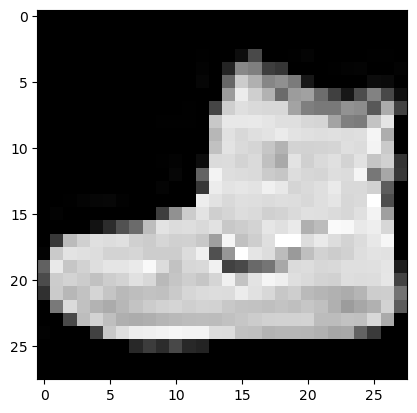

In [104]:
plt.imshow(x_train[0,], cmap="gray")

In [105]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model

In [106]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg', distribution='uniform')

In [107]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    # keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal" ),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [108]:
model.layers

[<Flatten name=flatten_3, built=True>,
 <BatchNormalization name=batch_normalization_9, built=True>,
 <Dense name=dense_13, built=True>,
 <BatchNormalization name=batch_normalization_10, built=True>,
 <Activation name=activation_3, built=True>,
 <Dense name=dense_14, built=True>,
 <BatchNormalization name=batch_normalization_11, built=True>,
 <LeakyReLU name=leaky_re_lu_3, built=True>,
 <Dense name=dense_15, built=True>]

In [109]:
weights = model.layers[1].get_weights()

In [110]:
weights

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

# Compile Model

In [111]:
sgd = keras.optimizers.SGD(clipvalue=1.0)

In [112]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

# Fit Model

In [113]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_split=0.15,
                    )

Epoch 1/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7096 - loss: 0.8783 - val_accuracy: 0.8244 - val_loss: 0.4894
Epoch 2/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8273 - loss: 0.4973 - val_accuracy: 0.8430 - val_loss: 0.4385
Epoch 3/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8391 - loss: 0.4561 - val_accuracy: 0.8507 - val_loss: 0.4133
Epoch 4/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8507 - loss: 0.4230 - val_accuracy: 0.8579 - val_loss: 0.3949
Epoch 5/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8578 - loss: 0.4025 - val_accuracy: 0.8628 - val_loss: 0.3864


In [114]:
history.history

{'accuracy': [0.774313747882843,
  0.8280392289161682,
  0.8419803977012634,
  0.8511372804641724,
  0.8558823466300964],
 'loss': [0.6692946553230286,
  0.49078166484832764,
  0.4469623267650604,
  0.42234504222869873,
  0.4073426425457001],
 'val_accuracy': [0.8244444727897644,
  0.8429999947547913,
  0.8506666421890259,
  0.8578888773918152,
  0.8627777695655823],
 'val_loss': [0.489423543214798,
  0.438516229391098,
  0.41333097219467163,
  0.3949073255062103,
  0.38642051815986633]}

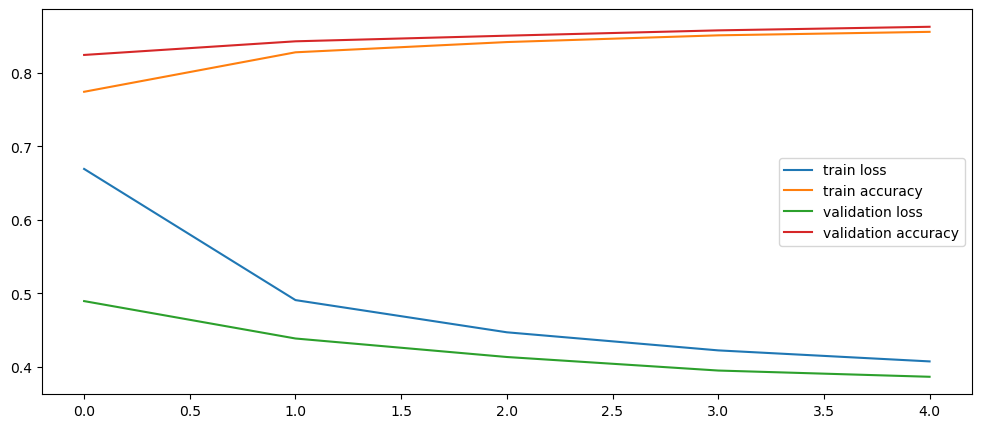

In [115]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [116]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        78,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 75)             │         7,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 75)             │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,498 (353.51 KB)

 Trainable params: 88,578 (346.01 KB)

 Non-trainable params: 1,918 (7.49 KB)

 Optimizer params: 2 (12.00 B)

# Save Model

In [117]:
model.save("model0.keras")
model0 = keras.models.load_model("model0.keras")

In [118]:
model0.layers

[<Flatten name=flatten_3, built=True>,
 <BatchNormalization name=batch_normalization_9, built=True>,
 <Dense name=dense_13, built=True>,
 <BatchNormalization name=batch_normalization_10, built=True>,
 <Activation name=activation_3, built=True>,
 <Dense name=dense_14, built=True>,
 <BatchNormalization name=batch_normalization_11, built=True>,
 <LeakyReLU name=leaky_re_lu_3, built=True>,
 <Dense name=dense_15, built=True>]

In [119]:
model0.layers[4].trainable

True

In [120]:
model1 = keras.models.Sequential([model0.layers[-1]])

In [121]:
model1.add(keras.layers.Dense(1, activation="sigmoid"))

In [122]:
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 760 (2.97 KB)

 Trainable params: 760 (2.97 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
for layer in model1.layers:
    print(layer.trainable)

True
True


In [125]:
for layer in model1.layers[:-1]:
    layer.trainable = False
    print(layer.trainable)

False


In [126]:
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 760 (2.97 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 760 (2.97 KB)